#1. Installing library

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2. Importing library

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#3. Get the data

In [ ]:
url ='https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce'
od.download(url) #d0765c21255b62377bcefeb06c8c403f

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: josinsitinjak
Your Kaggle Key: ··········


100%|██████████| 42.6M/42.6M [00:00<00:00, 131MB/s]


In [ ]:
geolocation = pd.read_csv('/content/brazilian-ecommerce/olist_geolocation_dataset.csv')
item = pd.read_csv('/content/brazilian-ecommerce/olist_order_items_dataset.csv')
category = pd.read_csv('/content/brazilian-ecommerce/product_category_name_translation.csv')
review = pd.read_csv('/content/brazilian-ecommerce/olist_order_reviews_dataset.csv')
payment = pd.read_csv('/content/brazilian-ecommerce/olist_order_payments_dataset.csv')
product = pd.read_csv('/content/brazilian-ecommerce/olist_products_dataset.csv')
seller = pd.read_csv('/content/brazilian-ecommerce/olist_sellers_dataset.csv')

#4.Customer dataset

In [ ]:
customers = pd.read_csv('/content/brazilian-ecommerce/olist_customers_dataset.csv')

In [ ]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
customers["customer_state"].value_counts().head(5)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_state, dtype: int64

- Provinsi dengan consumer terbanyak dari State of Sao paulo dll

In [ ]:
customers["customer_city"].value_counts().head(5)

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_city, dtype: int64

- Kota dengan consumer yang paling banyak juga dari sao paulo

In [ ]:
percentage_city = customers['customer_city'].value_counts()/customers.shape[0]*100
percentage_city.head(5)

sao paulo         15.627357
rio de janeiro     6.920687
belo horizonte     2.788588
brasilia           2.142979
curitiba           1.529550
Name: customer_city, dtype: float64

- Percentase dari kota sao paulo sangat besar dan berbanding jauh dari kota lainnya

In [ ]:
percentage_city = pd.DataFrame(data=percentage_city)
percentage_city.head(5)

,customer_city
sao paulo,15.627357
rio de janeiro,6.920687
belo horizonte,2.788588
brasilia,2.142979
curitiba,1.529550


In [ ]:
percentage_city.reset_index(inplace=True)

In [ ]:
percentage_city = percentage_city.rename(columns={'index': 'city', 'customer_city': 'percentage_of_city'})

In [ ]:
percentage_city

,city,percentage_of_city
0,sao paulo,15.627357
1,rio de janeiro,6.920687
2,belo horizonte,2.788588
3,brasilia,2.142979
4,curitiba,1.529550
...,...,...
4114,bequimao,0.001006
4115,andarai,0.001006
4116,vargem grande,0.001006
4117,curvelandia,0.001006


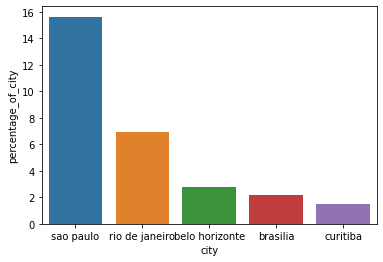

In [ ]:
sns.barplot(
    x='city',
    y='percentage_of_city',
    data=percentage_city.nlargest(5, 'percentage_of_city')
)

In [ ]:
# Repeat Order
repeat_order = customers.shape[0]/customers['customer_unique_id'].nunique()*100
round(repeat_order,2)
print(f"Persentase Repeat Order Olist = {repeat_order:.2f}")

Persentase Repeat Order Olist = 103.48


- Repeat order olist sangat rendah, tapi olist benar-benar memiliki cara yang sangat baik untuk menarik kustomer baru

# Order Dataset

In [ ]:
order = pd.read_csv('/content/brazilian-ecommerce/olist_orders_dataset.csv')

In [ ]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
print(order['order_id'].nunique())
print(order['customer_id'].nunique())

99441
99441


In [ ]:
#Change data 3,4,5,6,7 to datetime
date = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_purchase_timestamp']
for i in date:
  order[i] = pd.to_datetime(order[i])
  
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
# Feature make Month coloumn
order['month'] = order['order_purchase_timestamp'].dt.strftime('%b')
order['month'].head()

0    Oct
1    Jul
2    Aug
3    Nov
4    Feb
Name: month, dtype: object

In [ ]:
# Purchase name of the day feature
order['day_of_week'] = order['order_purchase_timestamp'].dt.day_name()
order['day_of_week'].head()

0       Monday
1      Tuesday
2    Wednesday
3     Saturday
4      Tuesday
Name: day_of_week, dtype: object

In [ ]:
# Purchase hour feature
order['hour'] = order['order_purchase_timestamp'].dt.hour
order['hour'].head()

0    10
1    20
2     8
3    19
4    21
Name: hour, dtype: int64

In [ ]:
order['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
# Purchase delivery time feature
order['delivery_time'] = order['order_delivered_customer_date'] - order['order_purchase_timestamp'] 
order['delivery_time']

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Name: delivery_time, Length: 99441, dtype: timedelta64[ns]

In [ ]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,day_of_week,hour,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Oct,Monday,10,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Jul,Tuesday,20,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Aug,Wednesday,8,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Nov,Saturday,19,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Feb,Tuesday,21,2 days 20:58:23
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Mar,Thursday,9,8 days 05:13:56
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Feb,Tuesday,12,22 days 04:38:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Aug,Sunday,14,24 days 20:37:34
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Jan,Monday,21,17 days 02:04:27


##Payment

In [ ]:
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
payment['order_id'].nunique()

99440

In [ ]:
payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
payment["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [ ]:
payment_percentage = payment['payment_type'].value_counts()/payment.shape[0]*100

In [ ]:
df_payment = pd.DataFrame(data=payment_percentage)
df_payment.reset_index(inplace=True)
df_payment = df_payment.rename(columns={'index': 'payment_tipe', 'review_score': 'percentage_of_payment_tipe'})

In [ ]:
df_payment = df_payment.rename(columns={'payment_type': 'percentage_of_payment_tipe'})

###Tipe pembayaran

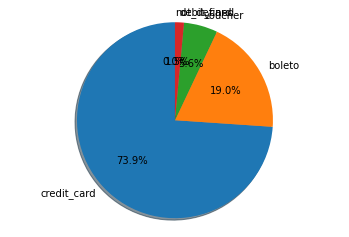

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df_payment['percentage_of_payment_tipe'], labels=df_payment['payment_tipe'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

- Tipe payment paling banyak dipakai yaitu Credit card, hingga 73,9%, diikuti oleh boleto, lalu ada voucher.

###Angsuran

In [ ]:
def f(row):
    if row['payment_installments'] == 1:
        val = 0
    else:
        val = 1
    return val

In [ ]:
payment['installment'] = payment.apply(f, axis=1)

In [ ]:
percentage_of_installment = payment.loc[payment['installment'] == 1,'installment'].count()/payment.shape[0]*100

In [ ]:
print(f"Persentase Angsuran Olist = {percentage_of_installment:.2f}")

Persentase Angsuran Olist = 49.42


- Hampir separuh pengguna dari Olist menggunakan fitur angsuran, yang berarti banyak dari produk Olist adalah produk yang harganya cukup mahal untuk angsuran, atau juga untuk mengangsur pada Olist cukup mudah dibanding e-commerce lain.

In [ ]:
payment_type_mean = payment.groupby('payment_type')['payment_value'].mean()

In [ ]:
df_payment_type_mean = pd.DataFrame(payment_type_mean)

In [ ]:
df_payment_type_mean.reset_index(inplace=True)
df_payment_type_mean = df_payment_type_mean.rename(columns={'index': 'payment_tipe', 'payment_value': 'mean_paymnent_value'})

In [ ]:
df_payment_type_mean

,payment_type,mean_paymnent_value
0,boleto,145.034435
1,credit_card,163.319021
2,debit_card,142.570170
3,not_defined,0.000000
4,voucher,65.703354


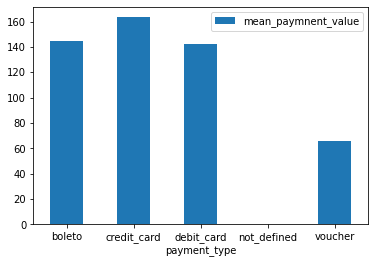

In [ ]:
ax = df_payment_type_mean.plot.bar(x='payment_type', y='mean_paymnent_value', rot=0)

- Credit card mempunyai rata-rata jumlah transaksi terbanyak, kemudian voucher juga memiliki jumlah pembayaran yang paling sedikit, mengartikan bahwa penggunaan voucher cukup efektif untuk mendapatkan diskon dari pembelian.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'payment_value')

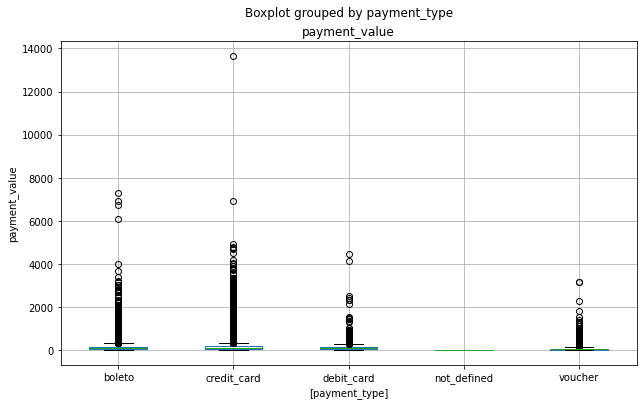

In [ ]:
ax = payment[['payment_type', 'payment_value']].boxplot(by='payment_type', figsize=(10,6))
ax.set_ylabel('payment_value')

- dari boxplot yang diatas dapat diketahui bahwa terdapat outlier pada credit card yang nilai nya hingga 14.000, begitu juga dengan tipe pembayaran lainnya, yang memiliki beberapa out lier.

##Penggabungan dataset dari payment dan order

In [ ]:
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value,installment
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1
...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,0
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1


In [ ]:
payment["order_id2"] = payment["order_id"]

In [ ]:
payment2 = payment.groupby(["order_id"], as_index = False).agg({"order_id2" : ["last"],
                                                               "payment_sequential" : ["mean"],
                                                               "payment_type" : ["last"],
                                                               "payment_installments" : ["mean"],
                                                               "payment_value" : ["mean"],
                                                                "installment" : ["last"]                                                                              
})

In [ ]:
payment2

,order_id,order_id2,payment_sequential,payment_type,payment_installments,payment_value,installment
,,last,mean,last,mean,mean,last
0,00010242fe8c5a6d1ba2dd792cb16214,00010242fe8c5a6d1ba2dd792cb16214,1.0,credit_card,2.0,72.19,1
1,00018f77f2f0320c557190d7a144bdd3,00018f77f2f0320c557190d7a144bdd3,1.0,credit_card,3.0,259.83,1
2,000229ec398224ef6ca0657da4fc703e,000229ec398224ef6ca0657da4fc703e,1.0,credit_card,5.0,216.87,1
3,00024acbcdf0a6daa1e931b038114c75,00024acbcdf0a6daa1e931b038114c75,1.0,credit_card,2.0,25.78,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,credit_card,3.0,218.04,1
...,...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,fffc94f6ce00a00581880bf54a75a037,1.0,boleto,1.0,343.40,0
99436,fffcd46ef2263f404302a634eb57f7eb,fffcd46ef2263f404302a634eb57f7eb,1.0,boleto,1.0,386.53,0
99437,fffce4705a9662cd70adb13d4a31832d,fffce4705a9662cd70adb13d4a31832d,1.0,credit_card,3.0,116.85,1


In [ ]:
payment2.columns = list(map(''.join,payment2.columns.values))

In [ ]:
payment2

,order_id,order_id2last,payment_sequentialmean,payment_typelast,payment_installmentsmean,payment_valuemean,installmentlast
0,00010242fe8c5a6d1ba2dd792cb16214,00010242fe8c5a6d1ba2dd792cb16214,1.0,credit_card,2.0,72.19,1
1,00018f77f2f0320c557190d7a144bdd3,00018f77f2f0320c557190d7a144bdd3,1.0,credit_card,3.0,259.83,1
2,000229ec398224ef6ca0657da4fc703e,000229ec398224ef6ca0657da4fc703e,1.0,credit_card,5.0,216.87,1
3,00024acbcdf0a6daa1e931b038114c75,00024acbcdf0a6daa1e931b038114c75,1.0,credit_card,2.0,25.78,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,credit_card,3.0,218.04,1
...,...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,fffc94f6ce00a00581880bf54a75a037,1.0,boleto,1.0,343.40,0
99436,fffcd46ef2263f404302a634eb57f7eb,fffcd46ef2263f404302a634eb57f7eb,1.0,boleto,1.0,386.53,0
99437,fffce4705a9662cd70adb13d4a31832d,fffce4705a9662cd70adb13d4a31832d,1.0,credit_card,3.0,116.85,1
99438,fffe18544ffabc95dfada21779c9644f,fffe18544ffabc95dfada21779c9644f,1.0,credit_card,3.0,64.71,1


In [ ]:
payment2['order_id'].nunique()

99440

In [ ]:
# merge order dataset and payment dataset
order_payment = order.merge(payment2, how='left', on='order_id')

In [ ]:
order_payment.shape

(99441, 18)

In [ ]:
order_payment.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
month                               0
day_of_week                         0
hour                                0
delivery_time                    2965
order_id2last                       1
payment_sequentialmean              1
payment_typelast                    1
payment_installmentsmean            1
payment_valuemean                   1
installmentlast                     1
dtype: int64

In [ ]:
order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,day_of_week,hour,delivery_time,order_id2last,payment_sequentialmean,payment_typelast,payment_installmentsmean,payment_valuemean,installmentlast
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Oct,Monday,10,8 days 10:28:40,e481f51cbdc54678b7cc49136f2d6af7,2.0,voucher,1.0,12.903333,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Jul,Tuesday,20,13 days 18:46:08,53cdb2fc8bc7dce0b6741e2150273451,1.0,boleto,1.0,141.460000,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Aug,Wednesday,8,9 days 09:27:40,47770eb9100c2d0c44946d9cf07ec65d,1.0,credit_card,3.0,179.120000,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Nov,Saturday,19,13 days 05:00:36,949d5b44dbf5de918fe9c16f97b45f8a,1.0,credit_card,1.0,72.200000,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Feb,Tuesday,21,2 days 20:58:23,ad21c59c0840e6cb83a9ceb5573f8159,1.0,credit_card,1.0,28.620000,0.0


In [ ]:
print(order_payment.loc[order_payment['installmentlast'] == 1, 'delivery_time'].mean())
print(order_payment.loc[order_payment['installmentlast'] == 0, 'delivery_time'].mean())

12 days 21:02:41.293127601
12 days 05:25:20.462770012


- Pada rata-rata dari waktu pengiriman yang dibutuhkan oleh order yang berangsur dengan tidak berangsung tidak memiliki perbedaan signifikan diantara keduanya. artinya angsuran tidak mempengaruhi waktu pengiriman.

In [ ]:
order_payment['selisih_approved_dan_purchased'] = order_payment['order_approved_at'] - order_payment['order_purchase_timestamp']
order_payment['selisih_approved_dan_purchased']

0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
99436   0 days 00:00:00
99437   0 days 00:11:39
99438   0 days 00:17:33
99439   0 days 00:07:54
99440   0 days 14:22:58
Name: selisih_approved_dan_purchased, Length: 99441, dtype: timedelta64[ns]

In [ ]:
print(order_payment.loc[order_payment['installmentlast'] == 1, 'selisih_approved_dan_purchased'].mean())
print(order_payment.loc[order_payment['installmentlast'] == 0, 'selisih_approved_dan_purchased'].mean())

0 days 05:08:04.157267923
0 days 15:56:17.123898360


- Pada analisis kali ini terdapat perbedaan signifikan antara selisih transaksi yang approved dengan purchased, terlihat bahwa transaksi yang menggunakan angsuran lebih cepat di approved, dibanding dengan transaksi yang tidak mengangsur.

In [ ]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,day_of_week,hour,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Oct,Monday,10,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Jul,Tuesday,20,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Aug,Wednesday,8,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Nov,Saturday,19,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Feb,Tuesday,21,2 days 20:58:23
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Mar,Thursday,9,8 days 05:13:56
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Feb,Tuesday,12,22 days 04:38:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Aug,Sunday,14,24 days 20:37:34
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Jan,Monday,21,17 days 02:04:27


In [ ]:
payment.shape[0]

103886

In [ ]:
order_payment

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,day_of_week,hour,delivery_time,order_id2last,payment_sequentialmean,payment_typelast,payment_installmentsmean,payment_valuemean,installmentlast,selisih_approved_dan_purchased
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Oct,Monday,10,8 days 10:28:40,e481f51cbdc54678b7cc49136f2d6af7,2.0,voucher,1.0,12.903333,0.0,0 days 00:10:42
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Jul,Tuesday,20,13 days 18:46:08,53cdb2fc8bc7dce0b6741e2150273451,1.0,boleto,1.0,141.460000,0.0,1 days 06:42:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Aug,Wednesday,8,9 days 09:27:40,47770eb9100c2d0c44946d9cf07ec65d,1.0,credit_card,3.0,179.120000,1.0,0 days 00:16:34
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Nov,Saturday,19,13 days 05:00:36,949d5b44dbf5de918fe9c16f97b45f8a,1.0,credit_card,1.0,72.200000,0.0,0 days 00:17:53
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Feb,Tuesday,21,2 days 20:58:23,ad21c59c0840e6cb83a9ceb5573f8159,1.0,credit_card,1.0,28.620000,0.0,0 days 01:01:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Mar,Thursday,9,8 days 05:13:56,9c5dedf39a927c1b2549525ed64a053c,1.0,credit_card,3.0,85.080000,1.0,0 days 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Feb,Tuesday,12,22 days 04:38:58,63943bddc261676b46f01ca7ac2f7bd8,1.0,credit_card,3.0,195.000000,1.0,0 days 00:11:39
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Aug,Sunday,14,24 days 20:37:34,83c1379a015df1e13d02aae0204711ab,1.0,credit_card,5.0,271.010000,1.0,0 days 00:17:33
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Jan,Monday,21,17 days 02:04:27,11c177c8e97725db2631073c19f07b62,1.0,credit_card,4.0,441.160000,1.0,0 days 00:07:54


In [ ]:
order_payment.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'month', 'day_of_week', 'hour', 'delivery_time', 'order_id2last',
       'payment_sequentialmean', 'payment_typelast',
       'payment_installmentsmean', 'payment_valuemean', 'installmentlast',
       'selisih_approved_dan_purchased'],
      dtype='object')

In [ ]:
order_payment[order_payment['payment_typelast'] == 'voucher']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,day_of_week,hour,delivery_time,order_id2last,payment_sequentialmean,payment_typelast,payment_installmentsmean,payment_valuemean,installmentlast,selisih_approved_dan_purchased
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Oct,Monday,10,8 days 10:28:40,e481f51cbdc54678b7cc49136f2d6af7,2.0,voucher,1.000000,12.903333,0.0,0 days 00:10:42
109,af5b0604e113e1526593d505a26ef39d,b896b244963dc7543d400ad82d6710e0,delivered,2017-09-27 12:07:22,2017-09-27 12:26:02,2017-09-29 22:25:42,2017-09-30 17:13:01,2017-10-16,Sep,Wednesday,12,3 days 05:05:39,af5b0604e113e1526593d505a26ef39d,1.0,voucher,1.000000,28.620000,0.0,0 days 00:18:40
120,ee0c5c649e17808bc4a363d3a80ebf85,cc3590e4afbb4b3e056b50a80a6a7d0c,delivered,2018-01-30 07:51:17,2018-01-30 08:13:43,2018-01-31 15:06:03,2018-02-20 15:25:04,2018-02-21,Jan,Tuesday,7,21 days 07:33:47,ee0c5c649e17808bc4a363d3a80ebf85,1.0,voucher,1.000000,53.200000,0.0,0 days 00:22:26
163,b2bd1f09c1b8a4a36940f6f6e49d5dec,8ed14e450a6268ec13f325e7c2eafeed,delivered,2018-02-02 16:15:41,2018-02-02 16:36:26,2018-02-06 01:28:26,2018-02-20 18:09:29,2018-03-07,Feb,Friday,16,18 days 01:53:48,b2bd1f09c1b8a4a36940f6f6e49d5dec,2.0,voucher,1.000000,71.713333,0.0,0 days 00:20:45
176,36ebb4199031e72a1fa964549b88c377,eecf2b94cdbe9ef6245fabb5e091c987,delivered,2018-04-04 08:39:50,2018-04-04 08:50:15,2018-04-07 00:49:39,2018-04-16 23:35:26,2018-05-02,Apr,Wednesday,8,12 days 14:55:36,36ebb4199031e72a1fa964549b88c377,1.0,voucher,1.000000,133.250000,0.0,0 days 00:10:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99301,16d2d0f24adb9d8c7cc566bbdc85b91e,5c8ef9c2247f72b079fc88ce53e7ce41,delivered,2018-07-20 16:44:44,2018-07-20 16:55:21,2018-07-23 14:04:00,2018-07-30 23:46:46,2018-08-03,Jul,Friday,16,10 days 07:02:02,16d2d0f24adb9d8c7cc566bbdc85b91e,1.0,voucher,1.000000,40.270000,0.0,0 days 00:10:37
99340,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 14:46:51,2018-04-05 15:09:52,2018-04-07 01:32:58,2018-04-30 21:41:07,2018-05-14,Apr,Thursday,14,25 days 06:54:16,4bafa54db6b060da198f23f810835969,2.0,voucher,1.333333,28.536667,0.0,0 days 00:23:01
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,Sep,Thursday,18,NaT,a89abace0dcc01eeb267a9660b5ac126,1.0,voucher,1.000000,107.130000,0.0,NaT
99381,97369eeb115806c27ee2054105eabe97,35647e39316747b2bb470dc93ddb67aa,delivered,2018-05-31 10:45:36,2018-05-31 10:55:10,2018-06-01 15:27:00,2018-06-04 20:10:57,2018-07-04,May,Thursday,10,4 days 09:25:21,97369eeb115806c27ee2054105eabe97,1.0,voucher,1.000000,12.390000,0.0,0 days 00:09:34


In [ ]:
order_payment['payment_ivalue_of_installment'] = order_payment['payment_valuemean'] / order_payment['payment_installmentsmean']
order_payment['payment_ivalue_of_installment']

0         12.903333
1        141.460000
2         59.706667
3         72.200000
4         28.620000
            ...    
99436     28.360000
99437     65.000000
99438     54.202000
99439    110.290000
99440     86.860000
Name: payment_ivalue_of_installment, Length: 99441, dtype: float64

##Customer order payment

In [ ]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
customers['customer_id'].nunique()

99441

In [ ]:
order_payment

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,day_of_week,hour,delivery_time,order_id2last,payment_sequentialmean,payment_typelast,payment_installmentsmean,payment_valuemean,installmentlast,selisih_approved_dan_purchased,payment_ivalue_of_installment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Oct,Monday,10,8 days 10:28:40,e481f51cbdc54678b7cc49136f2d6af7,2.0,voucher,1.0,12.903333,0.0,0 days 00:10:42,12.903333
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Jul,Tuesday,20,13 days 18:46:08,53cdb2fc8bc7dce0b6741e2150273451,1.0,boleto,1.0,141.460000,0.0,1 days 06:42:50,141.460000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Aug,Wednesday,8,9 days 09:27:40,47770eb9100c2d0c44946d9cf07ec65d,1.0,credit_card,3.0,179.120000,1.0,0 days 00:16:34,59.706667
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Nov,Saturday,19,13 days 05:00:36,949d5b44dbf5de918fe9c16f97b45f8a,1.0,credit_card,1.0,72.200000,0.0,0 days 00:17:53,72.200000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Feb,Tuesday,21,2 days 20:58:23,ad21c59c0840e6cb83a9ceb5573f8159,1.0,credit_card,1.0,28.620000,0.0,0 days 01:01:50,28.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Mar,Thursday,9,8 days 05:13:56,9c5dedf39a927c1b2549525ed64a053c,1.0,credit_card,3.0,85.080000,1.0,0 days 00:00:00,28.360000
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Feb,Tuesday,12,22 days 04:38:58,63943bddc261676b46f01ca7ac2f7bd8,1.0,credit_card,3.0,195.000000,1.0,0 days 00:11:39,65.000000
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Aug,Sunday,14,24 days 20:37:34,83c1379a015df1e13d02aae0204711ab,1.0,credit_card,5.0,271.010000,1.0,0 days 00:17:33,54.202000
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Jan,Monday,21,17 days 02:04:27,11c177c8e97725db2631073c19f07b62,1.0,credit_card,4.0,441.160000,1.0,0 days 00:07:54,110.290000


In [ ]:
order_payment['customer_id'].nunique()

99441

In [ ]:
customer_order_payment = customers.merge(order_payment, how='left', on='customer_id')

In [ ]:
customer_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   customer_id                     99441 non-null  object         
 1   customer_unique_id              99441 non-null  object         
 2   customer_zip_code_prefix        99441 non-null  int64          
 3   customer_city                   99441 non-null  object         
 4   customer_state                  99441 non-null  object         
 5   order_id                        99441 non-null  object         
 6   order_status                    99441 non-null  object         
 7   order_purchase_timestamp        99441 non-null  datetime64[ns] 
 8   order_approved_at               99281 non-null  datetime64[ns] 
 9   order_delivered_carrier_date    97658 non-null  datetime64[ns] 
 10  order_delivered_customer_date   96476 non-null  datetime64

In [ ]:
customer_order_payment.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
order_estimated_delivery_date        0
month                                0
day_of_week                          0
hour                                 0
delivery_time                     2965
order_id2last                        1
payment_sequentialmean               1
payment_typelast                     1
payment_installmentsmean             1
payment_valuemean                    1
installmentlast                      1
selisih_approved_dan_purchased     160
payment_ivalue_of_installment        1
dtype: int64

In [ ]:
customer_order_payment.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,hour,delivery_time,order_id2last,payment_sequentialmean,payment_typelast,payment_installmentsmean,payment_valuemean,installmentlast,selisih_approved_dan_purchased,payment_ivalue_of_installment
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,15,8 days 19:30:00,00e7ee1b050b8499577073aeb2a297a1,1.0,credit_card,2.0,146.87,1.0,0 days 00:16:37,73.435000
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,20,16 days 15:52:55,29150127e6685892b6eab3eec79f59c7,1.0,credit_card,8.0,335.48,1.0,0 days 00:10:08,41.935000
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,16,26 days 01:51:06,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,credit_card,7.0,157.73,1.0,1 days 00:11:25,22.532857
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,16,14 days 23:57:47,951670f92359f4fe4a63112aa7306eba,1.0,credit_card,1.0,173.30,0.0,0 days 01:22:41,173.300000
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,9,11 days 11:04:18,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,credit_card,8.0,252.25,1.0,0 days 00:18:39,31.531250


In [ ]:
customer_order_payment['customer_unique_id'].nunique()

96096

In [ ]:
city = customer_order_payment.groupby(by=["customer_city"]).sum()

In [ ]:
city

,customer_zip_code_prefix,hour,payment_sequentialmean,payment_installmentsmean,payment_valuemean,installmentlast,payment_ivalue_of_installment
customer_city,,,,,,,
abadia dos dourados,115620,51,3.0,12.0,413.50,1.0,215.833000
abadiania,72940,14,1.0,8.0,1025.52,1.0,128.190000
abaete,427440,182,12.0,42.0,1946.81,7.0,827.539833
abaetetuba,752840,180,11.5,65.0,4638.80,10.0,701.858250
abaiara,126480,31,2.0,8.0,332.15,2.0,99.258333
...,...,...,...,...,...,...,...
xinguara,617001,149,9.0,39.0,1608.51,5.0,586.701556
xique-xique,142200,42,3.0,3.0,230.56,0.0,230.560000
zacarias,30530,36,2.0,12.0,229.85,2.0,37.282500


In [ ]:
city.reset_index(inplace=True)

In [ ]:
city

,customer_city,customer_zip_code_prefix,hour,payment_sequentialmean,payment_installmentsmean,payment_valuemean,installmentlast,payment_ivalue_of_installment
0,abadia dos dourados,115620,51,3.0,12.0,413.50,1.0,215.833000
1,abadiania,72940,14,1.0,8.0,1025.52,1.0,128.190000
2,abaete,427440,182,12.0,42.0,1946.81,7.0,827.539833
3,abaetetuba,752840,180,11.5,65.0,4638.80,10.0,701.858250
4,abaiara,126480,31,2.0,8.0,332.15,2.0,99.258333
...,...,...,...,...,...,...,...,...
4114,xinguara,617001,149,9.0,39.0,1608.51,5.0,586.701556
4115,xique-xique,142200,42,3.0,3.0,230.56,0.0,230.560000
4116,zacarias,30530,36,2.0,12.0,229.85,2.0,37.282500
4117,ze doca,326825,83,5.0,16.0,878.92,3.0,631.587000


In [ ]:
city_payment_value = city[['customer_city','payment_valuemean']]

In [ ]:
city_payment_value.sort_values(by=['payment_valuemean'])

,customer_city,payment_valuemean
3622,sao sebastiao de campos,1.945000e+01
1161,demerval lobao,2.019000e+01
3221,sabaudia,2.042000e+01
2928,polo petroquimico de triunfo,2.070000e+01
1957,jenipapo de minas,2.258000e+01
...,...,...
1143,curitiba,2.441625e+05
558,brasilia,3.484739e+05
453,belo horizonte,4.152836e+05
3155,rio de janeiro,1.146532e+06


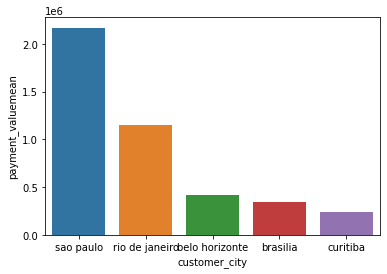

In [ ]:
sns.barplot(
    x='customer_city',
    y='payment_valuemean',
    data=city_payment_value.nlargest(5, 'payment_valuemean')
)

- Jumlah transaksi pada sao paulo tetap paling besar, diikuti oleh rio de janerio

In [ ]:
customer_order_payment['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
customer_order_payment[customer_order_payment['order_status'] == 'unavailable']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,hour,delivery_time,order_id2last,payment_sequentialmean,payment_typelast,payment_installmentsmean,payment_valuemean,installmentlast,selisih_approved_dan_purchased,payment_ivalue_of_installment
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,...,0,NaT,df8c077268f7f3baaac0892eb3143642,1.0,credit_card,4.0,174.54,1.0,0 days 00:26:38,43.635000
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,...,16,NaT,c609f82bcf7a90292a5940205ebd7e93,1.0,credit_card,2.0,117.78,1.0,0 days 00:26:03,58.890000
383,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaT,...,15,NaT,cb4a79c1e6c9ae44302861e7602cc449,1.0,credit_card,1.0,66.02,0.0,0 days 00:11:22,66.020000
556,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaT,...,14,NaT,af264f3527e94e431f0dcd56cd6b406d,1.0,credit_card,1.0,46.69,0.0,0 days 00:14:59,46.690000
567,6e067aaac313f893bd40273d8d75027f,f9ac86b4993a6e2a48758cb47d808712,89150,presidente getulio,SC,31f935babbc97f5990e0ffd128e19541,unavailable,2017-11-11 11:25:27,2017-11-11 11:35:31,NaT,...,11,NaT,31f935babbc97f5990e0ffd128e19541,1.0,credit_card,1.0,74.70,0.0,0 days 00:10:04,74.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98005,c13b88bfce55305a9240404088bd6a46,d6bc315c133be9c0a334b96002b4c1c1,13060,campinas,SP,f87f3a5e91df877dc36b65fb69ff2465,unavailable,2018-07-30 21:49:41,2018-07-30 22:24:21,NaT,...,21,NaT,f87f3a5e91df877dc36b65fb69ff2465,1.0,credit_card,1.0,52.73,0.0,0 days 00:34:40,52.730000
98267,7353b0fb8e8d9675e3a704c60ca44ebe,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,...,20,NaT,2f634e2cebf8c0283e7ef0989f77d217,1.0,credit_card,12.0,615.53,1.0,0 days 04:37:17,51.294167
98319,5effe9491d0f5a1c12ee4a384ec09bdf,e9429d622d9e764ca60ba01bc252b0a8,8690,suzano,SP,2b0edc4c59d83dcef85466718c36a317,unavailable,2017-09-29 19:17:10,2017-09-29 20:00:07,NaT,...,19,NaT,2b0edc4c59d83dcef85466718c36a317,1.0,credit_card,1.0,112.91,0.0,0 days 00:42:57,112.910000
98642,1761db2f0d235bbfa1c281093198af0c,21c2c79d24e2d8e3496aabb1f65d85c6,20270,rio de janeiro,RJ,8b08f0e729f58529ed03e763270f78d5,unavailable,2017-08-24 21:02:47,2017-08-24 21:15:36,NaT,...,21,NaT,8b08f0e729f58529ed03e763270f78d5,1.0,credit_card,1.0,136.50,0.0,0 days 00:12:49,136.500000


##Item

In [ ]:
item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
product = item.groupby(by=["product_id"]).sum()

In [ ]:
product

,order_item_id,price,freight_value
product_id,,,
00066f42aeeb9f3007548bb9d3f33c38,1,101.65,18.59
00088930e925c41fd95ebfe695fd2655,1,129.90,13.93
0009406fd7479715e4bef61dd91f2462,1,229.00,13.10
000b8f95fcb9e0096488278317764d19,2,117.80,39.20
000d9be29b5207b54e86aa1b1ac54872,1,199.00,19.27
...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,2,229.98,55.41
fff81cc3158d2725c0655ab9ba0f712c,1,90.00,7.89
fff9553ac224cec9d15d49f5a263411f,1,32.00,11.85


In [ ]:
product.reset_index(inplace=True)

In [ ]:
product

,product_id,order_item_id,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,1,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,1,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,1,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,2,117.80,39.20
4,000d9be29b5207b54e86aa1b1ac54872,1,199.00,19.27
...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2,229.98,55.41
32947,fff81cc3158d2725c0655ab9ba0f712c,1,90.00,7.89
32948,fff9553ac224cec9d15d49f5a263411f,1,32.00,11.85
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,169.95,58.87


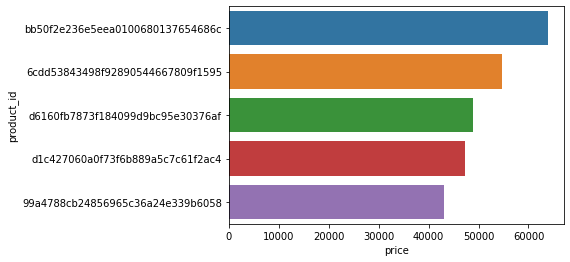

In [ ]:
sns.barplot(
    x='price',
    y='product_id',
    data=product.nlargest(5, 'price')
)

- Berikut merupakan 5 product, dengan jumlah harga yang terbesar, dan yang terbesar mencapai total 60.000. 

In [ ]:
seller = item.groupby(by=["seller_id"]).count()

In [ ]:
seller

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
seller_id,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,3,3,3,3,3,3
001cca7ae9ae17fb1caed9dfb1094831,239,239,239,239,239,239
001e6ad469a905060d959994f1b41e4f,1,1,1,1,1,1
002100f778ceb8431b7a1020ff7ab48f,55,55,55,55,55,55
003554e2dce176b5555353e4f3555ac8,1,1,1,1,1,1
...,...,...,...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,1,1,1,1,1
ffdd9f82b9a447f6f8d4b91554cc7dd3,20,20,20,20,20,20
ffeee66ac5d5a62fe688b9d26f83f534,14,14,14,14,14,14


In [ ]:
seller.reset_index(inplace=True)

In [ ]:
seller

,seller_id,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,0015a82c2db000af6aaaf3ae2ecb0532,3,3,3,3,3,3
1,001cca7ae9ae17fb1caed9dfb1094831,239,239,239,239,239,239
2,001e6ad469a905060d959994f1b41e4f,1,1,1,1,1,1
3,002100f778ceb8431b7a1020ff7ab48f,55,55,55,55,55,55
4,003554e2dce176b5555353e4f3555ac8,1,1,1,1,1,1
...,...,...,...,...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1,1,1,1,1,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,20,20,20,20,20,20
3092,ffeee66ac5d5a62fe688b9d26f83f534,14,14,14,14,14,14
3093,fffd5413c0700ac820c7069d66d98c89,61,61,61,61,61,61


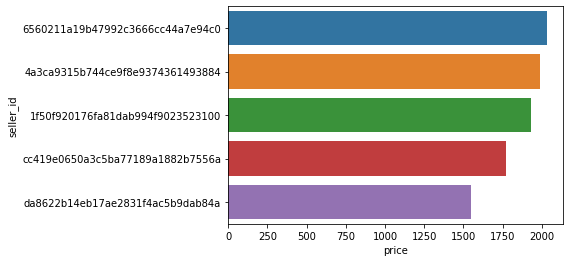

In [ ]:
sns.barplot(
    x='price',
    y='seller_id',
    data=seller.nlargest(5, 'price')
)

- Berikut 5 seller id dengan jumlah 

*   Item daftar
*   Item daftar

transaksi terbanyak, jumlah transaksi yang didapat hingga 2000 kali penjualan pada platform ini.

In [ ]:
item['freight_value_of_price'] = item['freight_value'] / item['price']
item['freight_value_of_price']

0         0.225637
1         0.083076
2         0.089799
3         0.984604
4         0.090745
            ...   
112645    0.144705
112646    0.104371
112647    0.169670
112648    0.155742
112649    0.297442
Name: freight_value_of_price, Length: 112650, dtype: float64

In [ ]:
item['freight_value_of_price'].describe()

count    112650.000000
mean          0.320864
std           0.349894
min           0.000000
25%           0.134034
50%           0.231356
75%           0.393036
max          26.235294
Name: freight_value_of_price, dtype: float64

##Customer item order payment

In [ ]:
item['order_id2'] = item['order_id']

In [ ]:
item2 = item.groupby(["order_id"], as_index = False).agg({"order_id2" : ["last"],
                                                          "order_item_id" : ["mean"],
                                                          "product_id" : ["last"],
                                                          "seller_id" : ["last"],
                                                          "shipping_limit_date" : ["last"],
                                                          "price" : ["mean"],
                                                          "freight_value" : ["mean"],
                                                          "freight_value_of_price" : ["mean"]
                                                                                                                              
})
"""'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'freight_value_of_price'"""

"'order_item_id', 'product_id', 'seller_id',\n       'shipping_limit_date', 'price', 'freight_value',\n       'freight_value_of_price'"

In [ ]:
item2.columns = list(map(''.join,item2.columns.values))

In [ ]:
item2.shape[0]

98666

In [ ]:
item2['order_id'].nunique()

98666

In [ ]:
customer_order_payment_item = customer_order_payment.merge(item2, how='left', on='order_id')

In [ ]:
item.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'freight_value_of_price', 'order_id2'],
      dtype='object')

In [ ]:
customer_order_payment_item

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,selisih_approved_dan_purchased,payment_ivalue_of_installment,order_id2last_y,order_item_idmean,product_idlast,seller_idlast,shipping_limit_datelast,pricemean,freight_valuemean,freight_value_of_pricemean
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,0 days 00:16:37,73.435000,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,0.175054
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,0 days 00:10:08,41.935000,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,0.160830
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1 days 00:11:25,22.532857,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,0.127126
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,0 days 01:22:41,173.300000,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,0.155796
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,0 days 00:18:39,31.531250,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,0.096739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,0 days 00:20:28,14.796667,6760e20addcf0121e9d58f2f1ff14298,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,0.185314
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,0 days 00:14:50,43.020000,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,0.123238
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,0 days 00:18:13,11.208000,fed4434add09a6f332ea398efd656a5c,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,0.514595
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,0 days 00:22:47,355.535000,e31ec91cea1ecf97797787471f98a8c2,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,0.032032


In [ ]:
customer_order_payment_item.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
order_estimated_delivery_date        0
month                                0
day_of_week                          0
hour                                 0
delivery_time                     2965
order_id2last_x                      1
payment_sequentialmean               1
payment_typelast                     1
payment_installmentsmean             1
payment_valuemean                    1
installmentlast                      1
selisih_approved_dan_purchased     160
payment_ivalue_of_installment        1
order_id2last_y                    775
order_item_idmean        

In [ ]:
customer_order_payment_item.shape[0]

99441

In [ ]:
city_freight_value = customer_order_payment_item.groupby('customer_city')['freight_valuemean'].mean()
df_city_freight_value = pd.DataFrame(city_freight_value)
df_city_freight_value.reset_index(inplace=True)
df_city_freight_value

,customer_city,freight_valuemean
0,abadia dos dourados,18.200000
1,abadiania,75.530000
2,abaete,17.833333
3,abaetetuba,44.514091
4,abaiara,34.625000
...,...,...
4114,xinguara,32.136667
4115,xique-xique,16.923333
4116,zacarias,15.525000
4117,ze doca,38.064000


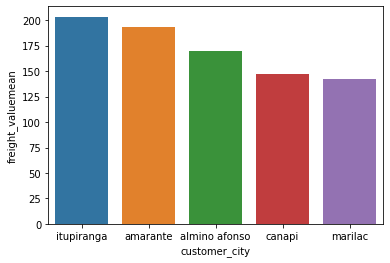

In [ ]:
sns.barplot(
    x='customer_city',
    y='freight_valuemean',
    data=df_city_freight_value.nlargest(5, 'freight_valuemean')
)

- Berikut merupakan kota customer dengan rata-rata biaya pengiriman terbesar yaitu itu piranga, per barangnya bisa mendapat biaya hingga 200.

###Approved by Seller

In [ ]:
seller_approved_time = customer_order_payment_item.groupby('seller_idlast')['selisih_approved_dan_purchased'].mean()

In [ ]:
seller_approved_time.sort_values(axis=0, ascending=True)

seller_idlast
80cfd480be3eb6d6267139f5cb793555   0 days 00:00:00
8501d82f68d23148b6d78bb7c4a42037   0 days 00:00:00
2cb4700db635baa1c0d4f90ed27b6669   0 days 00:00:00
77128dec4bec4878c37ab7d6169d6f26   0 days 00:00:00
5d043cd5512d4bd2f88e5ccdd5736c38   0 days 00:00:00
                                         ...      
b5d034ac251546e25afe9067f05c1539   3 days 13:48:58
babcc0ab201e4c60188427cae51a5b8b   4 days 05:54:42
278b6e0b20c4f61fefaa0577943d7a35   4 days 18:04:09
9c57bc60cfad5ee62d35d3f1ce4593a1   5 days 08:59:30
5444b12c82f21c923f2639ebc722c1ea   5 days 19:07:07
Name: selisih_approved_dan_purchased, Length: 3084, dtype: timedelta64[ns]

- Seller dengan approved tercepat

###Waktu pengepakan oleh seller

In [ ]:
customer_order_payment_item['waktu_pengepakan'] = customer_order_payment_item['order_delivered_carrier_date'] - customer_order_payment_item['order_approved_at']
customer_order_payment_item['waktu_pengepakan']

0        6 days 19:25:45
1        2 days 20:16:27
2       21 days 22:11:50
3       14 days 05:53:23
4        1 days 05:05:51
              ...       
99436    3 days 09:59:51
99437    1 days 10:07:23
99438    0 days 21:22:14
99439    2 days 20:53:21
99440    2 days 00:26:42
Name: waktu_pengepakan, Length: 99441, dtype: timedelta64[ns]

In [ ]:
customer_order_payment_item['customer_id'].nunique()

99441

##Finale Dataset

In [ ]:
Finale_dataset = customer_order_payment_item[["customer_id",
                                              "order_id",
                                              "customer_unique_id",
                                              "customer_city",
                                              "order_status",
                                              "month",
                                              "day_of_week",
                                              "hour",
                                              "delivery_time",
                                              "payment_typelast",
                                              "payment_installmentsmean",
                                              "payment_valuemean",
                                              "installmentlast",
                                              "selisih_approved_dan_purchased",
                                              "payment_ivalue_of_installment",
                                              "product_idlast",
                                              "seller_idlast",
                                              "pricemean",
                                              "freight_valuemean",
                                              "freight_value_of_pricemean",
                                              "waktu_pengepakan"
                                              ]]

In [ ]:
Finale_dataset

,customer_id,order_id,customer_unique_id,customer_city,order_status,month,day_of_week,hour,delivery_time,payment_typelast,...,payment_valuemean,installmentlast,selisih_approved_dan_purchased,payment_ivalue_of_installment,product_idlast,seller_idlast,pricemean,freight_valuemean,freight_value_of_pricemean,waktu_pengepakan
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,franca,delivered,May,Tuesday,15,8 days 19:30:00,credit_card,...,146.87,1.0,0 days 00:16:37,73.435000,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,0.175054,6 days 19:25:45
1,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,delivered,Jan,Friday,20,16 days 15:52:55,credit_card,...,335.48,1.0,0 days 00:10:08,41.935000,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,0.160830,2 days 20:16:27
2,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,delivered,May,Saturday,16,26 days 01:51:06,credit_card,...,157.73,1.0,1 days 00:11:25,22.532857,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,0.127126,21 days 22:11:50
3,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,delivered,Mar,Tuesday,16,14 days 23:57:47,credit_card,...,173.30,0.0,0 days 01:22:41,173.300000,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,0.155796,14 days 05:53:23
4,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,campinas,delivered,Jul,Sunday,9,11 days 11:04:18,credit_card,...,252.25,1.0,0 days 00:18:39,31.531250,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,0.096739,1 days 05:05:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,delivered,Apr,Saturday,15,6 days 04:18:20,credit_card,...,88.78,1.0,0 days 00:20:28,14.796667,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,0.185314,3 days 09:59:51
99437,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,delivered,Apr,Wednesday,8,7 days 10:34:23,credit_card,...,129.06,1.0,0 days 00:14:50,43.020000,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,0.123238,1 days 10:07:23
99438,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,fortaleza,delivered,Apr,Sunday,20,30 days 22:51:25,credit_card,...,56.04,1.0,0 days 00:18:13,11.208000,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,0.514595,0 days 21:22:14
99439,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,canoas,delivered,Nov,Friday,21,12 days 22:50:06,credit_card,...,711.07,1.0,0 days 00:22:47,355.535000,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,0.032032,2 days 20:53:21


In [ ]:
Finale_dataset.isnull().sum()

customer_id                          0
order_id                             0
customer_unique_id                   0
customer_city                        0
order_status                         0
month                                0
day_of_week                          0
hour                                 0
delivery_time                     2965
payment_typelast                     1
payment_installmentsmean             1
payment_valuemean                    1
installmentlast                      1
selisih_approved_dan_purchased     160
payment_ivalue_of_installment        1
product_idlast                     775
seller_idlast                      775
pricemean                          775
freight_valuemean                  775
freight_value_of_pricemean         775
waktu_pengepakan                  1797
dtype: int64

##Simpulan
- **Hour** waktu pembelian yang paling banyak dilakukan adalah pada waktu malam, dibanding dengan siang hari, waktu malam banyak orang sudah menyelesaikan pekerjaan, dan dapat melakukan pembelian kebutuhan.

- **Day of wee** hari pembelian tidak memiliki hari yang spesifik, setiap hari orang melakukan pembelian yang cukup sama.

- **City of Customer** Kota dengan kustomer terbanyak terdapat pada Sao paulo, pada kota ini sebagian besar kustomer yang signifikan sebesar 15%

- **Repeat order** Repeat order pada Olist terbilang cukup rendah yaitu 108%, artinya hanya 8% pembeli yang melakukan pembelian ulang pada e-commerce ini, dilain hal olist memiliki cara yang sangat baik untuk menarik kustomer baru.

- **Seller** Penjual yang memiliki jumlah transaksi terbanyak selama 3 tahun hingga 2000 transaksi, artinya hampir setiap hari ada pembeli pada seller ini.

- **Angsuran** Sebagian dari kustomer Olist melakukan transaksi secara mengangsur.

- **Pengiriman** Rata-rata waktu pengiriman Olist adalah 12 hari.